# Project: Wrangling and Analyze Data

## Data Wrangling - Gather the required information

There are 3 sources for this project which are listed below.

- twitter enhanced archive file - csv file from udacity
- image prediction file - tsv file from udacity
- tweet details file - json file from udacity <unable to register with Twitter>

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
pd.set_option('display.max_colwidth', None) # to display the whole strings and not collapse them
pd.set_option('display.max_columns', None) # to not collapse columns when viewing data
pd.set_option('display.max_rows', None) # to display all rows in the output

<b>1. twitter enhance archive file (reading it from local drive)

In [2]:
#read twitter_archive_enhanced.csv
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


<b> 2. Image prediction file (udacity url)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# request tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# save the file
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

# load the tab separated file
df_img_preds = pd.read_csv('image_predictions.tsv', sep='\t')
df_img_preds.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


<b>3. tweet details file(json from udacity)

In [4]:
#Use the tweet_json file from udacity as i have had issues in creating elevated access
df_json = pd.read_json('tweet_json.json', lines=True, encoding='utf-8')
df_json.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"T

<b>Note</b>

I was unable to get my phonenumber registered with Twitter(tried multiple times with no luck), hence had to downlad the json file provided in the udacity module

In [5]:
#Use the tweet_json file from udacity as i have had issues in creating elevated access
json_df = pd.read_json('tweet_json.json', lines=True, encoding='utf-8')
json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"T

In [6]:
#eliminate unwanted columns and rename the column names
df_json = json_df[['id','favorite_count','retweet_count','retweeted_status']]
df_json.columns = ['tweet_id','likes','retweet','retweeted']
df_json['retweeted'] = df_json['retweeted'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df_json.head(2)

C:\Users\ganes\AppData\Local\Temp\ipykernel_2436\2925434538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json['retweeted'] = df_json['retweeted'].apply(lambda x: 1 if not pd.isnull(x) else 0)


,tweet_id,likes,retweet,retweeted
0,892420643555336193,39467,8853,0
1,892177421306343426,33819,6514,0


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



<b>Data Wrangling - Assess the data

The ojective is this section will be to work on theb following

1) Original tweets.
2) Tweets that has an image of a dog.

The outcome after assessing and cleaning the data should be one consolidated dataframe/file with the required data.

We will visually and programatically analyse all 3 data frames.

<b>1. twitter enhanced archive (df_archive)

In [7]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
885,760153949710192640,NaN,NaN,2016-08-01 16:43:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @hownottodraw: The story/person behind @dog_rates is heckin adorable af. 11/10, probably would pet. https://t.co/AG5UnRrmzJ",7.601538e+17,1.950368e+08,2016-08-01 16:42:51 +0000,"https://weratedogs.com/pages/about-us,https://weratedogs.com/pages/about-us",11,10,None,None,None,None,None
506,812747805718642688,NaN,NaN,2016-12-24 19:52:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10 https://t.c…",6.800555e+17,4.196984e+09,2015-12-24 16:00:30 +0000,https://twitter.com/dog_rates/status/680055455951884288/photo/1,10,10,Sammy,None,None,None,None
629,794355576146903043,NaN,NaN,2016-11-04 01:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Butter. She can have whatever she wants forever. 12/10 would hug softly https://t.co/x5gXRS1abq,7.887659e+17,4.196984e+09,2016-10-19 15:37:03 +0000,"https://twitter.com/dog_rates/status/788765914992902144/photo/1,https://twitter.com/dog_rates/status/788765914992902144/photo/1",12,10,Butter,None,None,None,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320556335104/photo/1,10,10,Kial,None,None,None,None
52,882045870035918850,NaN,NaN,2017-07-04 01:18:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Koko. Her owner, inspired by Barney, recently built a cart for her to use during walks if she got tired. 13/10 rest easy Koko https://t.co/zeDpnsKX7w",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1",13,10,Koko,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,None,None,None,None
1349,704134088924532736,NaN,NaN,2016-02-29 02:40:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This sneezy pupper is just adorable af. 12/10 (vid by @gwilks1) https://t.co/h5aI0Tim4j,NaN,NaN,NaN,https://vine.co/v/igW2OEwu9vg,12,10,None,None,None,pupper,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRoZUWFmd,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53 +0000,"<a href=""http://twitter.com

In [8]:
df_archive.info()
# in_reply and retweeted columns have nulls for all tweets that were not a reply or a retweet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# there are some outlier(values >100), some of which are wrong based on the text
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [11]:
df_archive.query('rating_denominator ==2').text

2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

In [12]:
# there are some outliers in the data
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [13]:
df_archive.query('rating_numerator == 960').text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [14]:
# decimal rating numerator: the actual rating is 13.5/10 based on the value in text column, but 5/10 is present
df_archive[df_archive.index==45]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None


In [15]:
# some names are clearly not correctly extracted Ex: A name with just the value a, the, an
df_archive.name.value_counts().nlargest(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

In [16]:
# expanded url indicates tweets with a photo and there are invalid links, i.e. not all tweets have pictures
df_archive.expanded_urls.sample(20)

1993                                                                                                                                                                                                                        https://twitter.com/dog_rates/status/672609152938721280/photo/1
1167                        https://twitter.com/dog_rates/status/721503162398597120/photo/1,https://twitter.com/dog_rates/status/721503162398597120/photo/1,https://twitter.com/dog_rates/status/721503162398597120/photo/1,https://twitter.com/dog_rates/status/721503162398597120/photo/1
568                                                                                https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1
1663                                                                                                                                                

In [17]:
df_archive.expanded_urls.nunique()

2218

In [18]:
#not all tweets have images
df_archive.tweet_id.nunique()

2356

<b>df_archive issues

<b> Quality
    
Validity:
- Exclude retweets with empty values
- Exclude retweets without images

Accuracy:
- Ratings of more than 10/10 is acceptable but there are outliers present in numerators and some are wrongly coded based on the text
- rating_denominator has outliers and inaccurate infromation based on text
- There are incorrect values in names and stages

Consistency:
- Incorrect data types - timestamps should be datetime, ratings should be float to allow decimal values

<b>Tidiness
    
- Columns doggo, floofer, pupper and puppo are actually values of a single column dog_stage
- rating would make more sense as a seprate column by combining the values of numerator and denominator    

<b>2. Tweet image predictions (df_img_preds)

In [19]:
df_img_preds.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
983,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,Lakeland_terrier,0.738277,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True
790,690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True
1464,778408200802557953,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True
1253,748307329658011649,https://pbs.twimg.com/media/CmKFi-FXEAAeI37.jpg,2,paddle,0.589066,False,shovel,0.038062,False,mountain_tent,0.029203,False
1262,748977405889503236,https://pbs.twimg.com/media/CmTm-XQXEAAEyN6.jpg,1,German_short-haired_pointer,0.742216,True,bluetick,0.152810,True,English_setter,0.051835,True
662,682638830361513985,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1,English_springer,0.440781,True,Cardigan,0.411182,True,Border_collie,0.022412,True
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,1,Border_terrier,0.482452,True,German_shepherd,0.181082,True,Norwegian_elkhound,0.065257,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1586,797971864723324932,https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg,1,American_Staffordshire_terrier,0.489845,True,Chihuahua,0.305760,True,Staffordshire_bullterrier,0.072799,True


In [20]:
df_img_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#probability values looks valid
df_img_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
#26.16% are not a prediction of dogs in(p1)
1-df_img_preds.p1_dog.mean()

0.2616867469879518

In [23]:
# dog names do not follow a proper case and also has special characters
df_img_preds.p1.value_counts().nlargest(20)

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Name: p1, dtype: int64

In [24]:
df_img_preds.tweet_id.nunique()

2075

<b>df_img_preds issues

Quality:
- We require ratings if dogs where p(1,2,3)_dog is True
- Some dog names start with an uppercase, some with a lowercase letter

Tidiness:

- The columns relevant for analysis can be merged with the main df_archive dataframe
- Some columns will not be required for the analysis and can be deleted

<b> 3. Tweet details from json file (df_json)

In [25]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   likes      2354 non-null   int64
 2   retweet    2354 non-null   int64
 3   retweeted  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


<b>Tidiness
- Information from df_json can be merged with df_archive


Issues identified for cleaning

Visual and programmatic inspection revealed the following issues:
Quality

Completeness:

    -

Validity:

    df_archive: we should exclude REtweets
    df_archive: we should exclude tweets without images
    df_preds: we only want ratings of dogs, i.e. where px_dog is True

Accuracy:

    df_archive: ratings of more than 10/10 are acceptable, but there are some really extreme or decimal values of rating_numerator, which are wrongly extracted based on the text
    df_archive: ratings can have various bases, but some rating_denominator values are inaccurate based on the text
    df_archive: some names and stages have incorrect values

Consistency:

    df_archive: incorrect data types - timestamp should be datetime, rating columns should be floats to allow for decimals
    df_preds: some dog names start with an uppercase, some with a lowercase letter

Tidiness

    df_archive: columns doggo, floofer, pupper, puppo are actually values of a single column dog_stage
    df_archive: rating would make more sense in its own column combining the numerator and denominator columns
    df_preds: the columns relevant for analysis can be merged with the main df_archive file, they do not have to be in a separate table
    df_preds: some columns will not be interesting for the analysis and can be deleted
    df_likes: information should be included in the main archive table, there is no reason to have it in a separate data frame



<b>Data Wrangling - Clean

In the follwoing section we will use Define - Code - Test to review and fix the issues identified

In [26]:
# create copies of all files
df_archive_clean = df_archive.copy()
df_img_preds_clean = df_img_preds.copy()
df_json_clean = df_json.copy()

<b>Define #1

Merge all three data frames into one


<b> Code #1

In [27]:
# merging into one file
df_clean = pd.merge(df_archive_clean, df_img_preds_clean, on='tweet_id', how='left')
df_clean = pd.merge(df_clean, df_json_clean, on='tweet_id', how='left')

<b>Test #1

In [28]:
df_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweet,retweeted
800,772615324260794368,NaN,NaN,2016-09-05 02:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Gromit. He's pupset because there's no need to beware of him. Just wants a pettin. 10/10 https://t.co/eSvz4EapHH,7.652221e+17,4.196984e+09,2016-08-15 16:22:20 +0000,"https://twitter.com/dog_rates/status/765222098633691136/photo/1,https://twitter.com/dog_rates/status/765222098633691136/photo/1",10,10,Gromit,None,None,None,None,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1.0,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True,0.0,3914.0,1.0
1300,707693576495472641,NaN,NaN,2016-03-09 22:24:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jiminus. He's in a tub for some reason. What a jokester. Smh 7/10 churlish af https://t.co/84L4ED9Tpi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707693576495472641/photo/1,7,10,Jiminus,None,None,None,None,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1.0,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False,3765.0,1133.0,0.0


In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<b>Define #2

- drop tweets that are retweets
 - retweets: tweets for which df_archive.retweeted_status_id not null, which should be the same tweets as df_likes.retweeted == 1 if the information in the archive is correct
- drop related columns which will not be needed for the analysis

<b>Code #2

In [30]:
df_clean.retweeted.value_counts()

0.0    2175
1.0     179
Name: retweeted, dtype: int64

In [31]:
# all retweeted == 1 are also retweeted_status_id non null
df_clean[(df_clean['retweeted'] == 1) & (df_clean['retweeted_status_id'].isnull()==False)].shape

(179, 31)

In [32]:
# delete 179 retweeted tweet rows and test
df_clean.drop(df_clean[df_clean['retweeted'] == 1].index, inplace=True)
df_clean.retweeted.value_counts()

0.0    2175
Name: retweeted, dtype: int64

In [33]:
df_clean.retweeted_status_id.isnull().value_counts()

True     2175
False       2
Name: retweeted_status_id, dtype: int64

In [34]:
# 2 remaining rows are retweets, but these were not included in df_json (i.e. these tweet_ids were not part of the json file from udacity)
df_clean[df_clean['retweeted_status_id'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweet,retweeted
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2.0,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,NaN,NaN,NaN
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,"https://twitter.com/katieornah/status/771002130450743296/photo/1,https://twitter.com/katieornah/status/771002130450743296/photo/1",12,10,None,None,None,pupper,None,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1.0,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False,NaN,NaN,NaN


<b>Test #2

In [35]:
df_clean.retweeted_status_id.isnull().value_counts()

True     2175
False       2
Name: retweeted_status_id, dtype: int64

In [36]:
# these should be deleted, too
df_clean.drop(df_clean[df_clean['retweeted_status_id'].isnull()==False].index, inplace=True)

# we eliminated all retweets and will not need related columns
df_clean.drop(['retweeted', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  jpg_url                1994 non-null   object 
 15  img_

<b>Define #3

- drop tweets that do not have an image
  - tweets with df_archive.expanded_urls null, which should be tweets with df_preds.jpg_url null
- drop related columns which will not be needed for the analysis

<b>Code #3

In [38]:
# 58 rows have no picture information and needs to be removed
df_clean[(df_clean['expanded_urls'].isnull()==True) & (df_clean['jpg_url'].isnull()==True)].shape

(58, 27)

In [39]:
df_clean.drop(df_clean[(df_clean['expanded_urls'].isnull()==True) & (df_clean['jpg_url'].isnull()==True)].index, inplace=True)
df_clean.shape

(2117, 27)

In [40]:
# test for missing images
df_clean.expanded_urls.isnull().value_counts()

False    2117
Name: expanded_urls, dtype: int64

In [41]:
# there are still 123 missing jpg_urls, as these were not included in the predictions file
df_clean.jpg_url.isnull().value_counts()

False    1994
True      123
Name: jpg_url, dtype: int64

In [42]:
# upon visual inspection, these tweets does not have an image 
# included in the expanded_urls
df_clean[df_clean['jpg_url'].isnull()==True].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweet
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13/10\nhttps://t.co/LEZ8jR5txd,https://twitter.com/bvuepd/status/804417859124273152,13,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6886.0,2355.0
1549,689255633275777024,NaN,NaN,2016-01-19 01:18:43 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ferg. He swallowed a chainsaw. 1 like = 1 prayer 10/10 remain calm Ferg (vid by @calebturer) https://t.co/gOH51Y8Yh1,https://vine.co/v/iOL792n5hz2,10,10,Ferg,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2805.0,1212.0
323,834089966724603904,NaN,NaN,2017-02-21 17:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE 10/10 https://t.co/ffIH2WxwF0,https://twitter.com/stevekopack/status/834086676934836224,10,10,None,doggo,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10971.0,2427.0
951,751950017322246144,NaN,NaN,2016-07-10 01:23:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Lola. She's a surfing pupper. 13/10 magical af https://t.co/BlGQkhM5EV,https://vine.co/v/5WrjaYAMvMO,13,10,Lola,None,None,pupper,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3415.0,1060.0
1369,702332542343577600,NaN,NaN,2016-02-24 03:21:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Rudy. He's going to be a star. 13/10 talented af (vid by @madalynrossi) https://t.co/Dph4FDGoMd,https://vine.co/v/irlDujgwOjd,13,10,Rudy,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3491.0,1755.0
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Some happy pupper news to share. 10/10 for everyone involved \nhttps://t.co/MefMAZX2uv,http://us.blastingnews.com/news/2017/01/200-dogs-saved-from-south-korean-dog-meat-industry-001385441.html?sbdht=_pM1QUzk3wsfscF9XF2WEd9KoWDpsQlMUjfh1HxxUq0u5mMbiu2B0kw2_,10,10,None,None,None,pupper,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2550.0,462.0
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3195.0,594.0
1577,687399393394311168,NaN,NaN,2016-01-13 22:22:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Barry. He's very fast. I hope he finds what he's looking for. 10/10 (vid by @KeeganWolfe33) https://t.co/nTAsyvbIiO,https://vine.co/v/iM2hLu9LU5i,10,10,Barry,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2081.0,702.0
539,806576416489959424,NaN,NaN,2016-12-07 19:09:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Hooman catch successful. Massive hit by dog. Fumble ensued. Possession to dog. 13/10 https://t.co/QrFkqgHR1G,https://twitter.com/deadspin/status/806570933175652352,13,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5370.0,2230.0
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ,https:

In [43]:
# Hence deleting the above tweets
df_clean.drop(df_clean[df_clean['jpg_url'].isnull()==True].index, inplace=True)

<b> Test#3

In [44]:
df_clean.jpg_url.isnull().value_counts()

False    1994
Name: jpg_url, dtype: int64

In [45]:
# drop expanded_url as it is not required
df_clean.drop(['expanded_urls'], axis=1, inplace=True)

In [46]:
list(df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'likes',
 'retweet']

<b>Define #4

- Find tweets where the predicted animal is a dog and exclude that are not predicted as dogs i.e. where df_preds.p1_dog == False


<b>Code #4

In [47]:
# I will use True-False-False and True-True-False predictions
df_clean.groupby(['p1_dog', 'p2_dog', 'p3_dog']).count()['tweet_id']

p1_dog  p2_dog  p3_dog
False   False   False      308
                True        62
        True    False       52
                True        95
True    False   False       43
                True        86
        True    False      145
                True      1203
Name: tweet_id, dtype: int64

In [48]:
df_clean.drop(df_clean[df_clean['p1_dog']==False].index, inplace=True)

<b>Test #4

In [49]:
df_clean.groupby(['p1_dog', 'p2_dog', 'p3_dog']).count()['tweet_id']

p1_dog  p2_dog  p3_dog
True    False   False       43
                True        86
        True    False      145
                True      1203
Name: tweet_id, dtype: int64

In [50]:
# we can delete some addtional information from df_clean: 
# img_num, p1_dog, p2_dog, p3_dog, p2_conf, p3_conf
df_clean.drop(['img_num', 'p1_dog', 'p2_dog', 'p3_dog', 'p2_conf', 'p3_conf'], axis=1, inplace=True)

In [51]:
df_clean.shape

(1477, 20)

In [52]:
#We eliminated columns that are not required. Keeping the dataset to minimul will be a good practice for visualisation
list(df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'p1',
 'p1_conf',
 'p2',
 'p3',
 'likes',
 'retweet']

<b>Define #5

- solve the tidiness issue of dog stage columns:
  - doggo, floofer, pupper and puppo should all be included in one column dog_stage as values


In [53]:
df_clean['dog_stage'] = ''

def find_dog_stage(row):
    dog_stage = []
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')    
    if len(dog_stage) < 1:
        row['dog_stage'] = 'None'
    else: 
        row['dog_stage'] = ','.join(dog_stage)
    
    # return updated column
    return row

# apply to all rows
df_clean = df_clean.apply(find_dog_stage, axis=1)

# drop redundant columns
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

<b>Test #5

In [54]:
# based on the result belwo, there are 10 dogs that have more than one stage defined, let's clean these manually
df_clean.groupby('dog_stage').count()['tweet_id']

dog_stage
None             1249
doggo              48
doggo,floofer       1
doggo,pupper        8
doggo,puppo         1
floofer             7
pupper            144
puppo              19
Name: tweet_id, dtype: int64

<b>Define #6

- clean dog_stage column with double stages


In [55]:
# this should be floofer
df_clean[df_clean['dog_stage']=='doggo,floofer'][['tweet_id', 'text', 'dog_stage']]

,tweet_id,text,dog_stage
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","doggo,floofer"


In [56]:
# puppo
df_clean[df_clean['dog_stage']=='doggo,puppo'][['tweet_id', 'text', 'dog_stage']]

,tweet_id,text,dog_stage
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,"doggo,puppo"


In [57]:
# The following ones have 2 dogs on the pictures and lets make them doggo
df_clean[df_clean['dog_stage']=='doggo,pupper'][['tweet_id', 'text', 'dog_stage']]

,tweet_id,text,dog_stage
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7","doggo,pupper"
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,"doggo,pupper"
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze","doggo,pupper"
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"doggo,pupper"
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","doggo,pupper"
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,"doggo,pupper"
1063,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,"doggo,pupper"
1113,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda","doggo,pupper"


In [58]:
df_clean['dog_stage'].replace({'doggo,floofer': 'floofer', 'doggo,puppo': 'puppo', 'doggo,pupper': 'doggo'}, inplace=True)

<b>Test#6

In [59]:
df_clean.groupby('dog_stage').count()['tweet_id']

dog_stage
None       1249
doggo        56
floofer       8
pupper      144
puppo        20
Name: tweet_id, dtype: int64

<b>Define #7
- clean rating_numerator and rating_denominator columns (inaccurate values)

<b>Code #7

In [60]:
# change data types to enable storing all correct numbers including decimals
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

In [61]:
# find decimal numerator (where denominator could be decimal, too) - there are 4 cases
df_clean[df_clean.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator']]

C:\Users\ganes\AppData\Local\Temp\ipykernel_2436\3970805962.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean[df_clean.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator']]


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [62]:
# find decimal numerator (where denominator could have decimal)
df_clean[df_clean.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator']]

C:\Users\ganes\AppData\Local\Temp\ipykernel_2436\2451147245.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean[df_clean.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator']]


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [63]:
# Clean them manually
df_clean.loc[df_clean['tweet_id'] == 883482846933004288, ['rating_numerator']] = 13.5
df_clean.loc[df_clean['tweet_id'] == 786709082849828864, ['rating_numerator']] = 9.75
df_clean.loc[df_clean['tweet_id'] == 778027034220126208, ['rating_numerator']] = 11.27
df_clean.loc[df_clean['tweet_id'] == 680494726643068929, ['rating_numerator']] = 11.26

In [64]:
# find decimal denominators - if there are any
df_clean[df_clean.text.str.contains(r"(\d+\/\d+\.\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

C:\Users\ganes\AppData\Local\Temp\ipykernel_2436\1822508270.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean[df_clean.text.str.contains(r"(\d+\/\d+\.\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator


In [65]:
# check if any tweet has more than one "numeric/numeric" pattern in its text
df_clean[df_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

C:\Users\ganes\AppData\Local\Temp\ipykernel_2436\4144509381.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean[df_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10.0
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10.0
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10.0
1465,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10.0,10.0
1508,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5.0,10.0
1525,690400367696297985,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,10.0,10.0


Observation from above result:

- Some of the lines have multiple ratings, i would assume that the first intstance can be taken for analysis.

In [66]:
df_clean.loc[df_clean['tweet_id'] == 740373189193256964, ['rating_numerator']] = 14
df_clean.loc[df_clean['tweet_id'] == 740373189193256964, ['rating_denominator']] = 10
df_clean.loc[df_clean['tweet_id'] == 722974582966214656, ['rating_numerator']] = 13
df_clean.loc[df_clean['tweet_id'] == 722974582966214656, ['rating_denominator']] = 10
df_clean.loc[df_clean['tweet_id'] == 716439118184652801, ['rating_numerator']] = 11
df_clean.loc[df_clean['tweet_id'] == 716439118184652801, ['rating_denominator']] = 10
df_clean.loc[df_clean['tweet_id'] == 666287406224695296, ['rating_numerator']] = 9
df_clean.loc[df_clean['tweet_id'] == 666287406224695296, ['rating_denominator']] = 10

<b>Test #7

In [67]:
# validate that the updated values are accurate
df_clean[df_clean.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

C:\Users\ganes\AppData\Local\Temp\ipykernel_2436\224478825.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean[df_clean.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [68]:
# no wrong double fractions remain
df_clean.loc[(df_clean['tweet_id'] == 740373189193256964) | (df_clean['tweet_id'] == 722974582966214656) |\
             (df_clean['tweet_id'] == 716439118184652801) | (df_clean['tweet_id'] == 666287406224695296)]\
[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10.0


<b>Define #8
- solve the tidiness issue of separate ratings columns
  - create one rating column combining the numerator and denominator


In [69]:
df_clean['rating'] = ''

def merge_rating(row):
    rating = []
    rating.append(str(row['rating_numerator']))
    rating.append(str(row['rating_denominator']))
    row['rating'] = '/'.join(rating)
    
    # return updated column
    return row

# apply to all rows
df_clean = df_clean.apply(merge_rating, axis=1)

# drop the separate rating columns
df_clean = df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

<b>Test #8

In [70]:
# rating is now stored in one column, so we solved the tidiness issue
# however, let's check some of the values for accuracy
#Note: I have kept the rating as string to keep the original value
df_clean.groupby('rating').count()['tweet_id'].nlargest(40)

rating
12.0/10.0      380
10.0/10.0      318
11.0/10.0      308
13.0/10.0      215
9.0/10.0       108
8.0/10.0        58
7.0/10.0        24
14.0/10.0       22
6.0/10.0        12
5.0/10.0         9
4.0/10.0         4
3.0/10.0         3
2.0/10.0         1
121.0/110.0      1
9.75/10.0        1
11.26/10.0       1
88.0/80.0        1
84.0/70.0        1
80.0/80.0        1
11.27/10.0       1
60.0/50.0        1
24.0/7.0         1
13.5/10.0        1
143.0/130.0      1
45.0/50.0        1
44.0/40.0        1
165.0/150.0      1
99.0/90.0        1
Name: tweet_id, dtype: int64

In [71]:
# let's check the couple of ratings that still look suspicious even after the cleaning we did in #7
# this is wrongly coded and no real rating included in the text
df_clean.query('rating == "24.0/7.0"').text

516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object

In [72]:
df_clean['rating'].replace({'24.0/7.0': None}, inplace=True)

In [73]:
# this one is correct
df_clean.query('rating == "165.0/150.0"').text

902    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object

In [74]:
# this one is correct
df_clean.query('rating == "121.0/110.0"').text

1635    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: text, dtype: object

<b>Test #8

In [75]:
df_clean.groupby('rating').count()['tweet_id'].nlargest(30)

rating
12.0/10.0      380
10.0/10.0      318
11.0/10.0      308
13.0/10.0      215
9.0/10.0       108
8.0/10.0        58
7.0/10.0        24
14.0/10.0       22
6.0/10.0        12
5.0/10.0         9
4.0/10.0         4
3.0/10.0         3
2.0/10.0         1
165.0/150.0      1
44.0/40.0        1
45.0/50.0        1
143.0/130.0      1
13.5/10.0        1
60.0/50.0        1
121.0/110.0      1
11.27/10.0       1
80.0/80.0        1
84.0/70.0        1
88.0/80.0        1
11.26/10.0       1
9.75/10.0        1
99.0/90.0        1
Name: tweet_id, dtype: int64

<b>Define #9
- delete unwanted columns

<b>Code #9

In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2355
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1477 non-null   int64  
 1   in_reply_to_status_id  14 non-null     float64
 2   in_reply_to_user_id    14 non-null     float64
 3   timestamp              1477 non-null   object 
 4   source                 1477 non-null   object 
 5   text                   1477 non-null   object 
 6   name                   1477 non-null   object 
 7   jpg_url                1477 non-null   object 
 8   p1                     1477 non-null   object 
 9   p1_conf                1477 non-null   float64
 10  p2                     1477 non-null   object 
 11  p3                     1477 non-null   object 
 12  likes                  1477 non-null   float64
 13  retweet                1477 non-null   float64
 14  dog_stage              1477 non-null   object 
 15  rati

In [77]:
#Lets set the tweet_id as the index fo the dataframe
df_clean.set_index('tweet_id', inplace=True)

In [78]:
# in_reply_to_status_id, in_reply_to_user_id only have 14 items, which will not be interesting for the analysis
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

<b>Test #9

In [79]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 892177421306343426 to 666020888022790149
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1477 non-null   object 
 1   source     1477 non-null   object 
 2   text       1477 non-null   object 
 3   name       1477 non-null   object 
 4   jpg_url    1477 non-null   object 
 5   p1         1477 non-null   object 
 6   p1_conf    1477 non-null   float64
 7   p2         1477 non-null   object 
 8   p3         1477 non-null   object 
 9   likes      1477 non-null   float64
 10  retweet    1477 non-null   float64
 11  dog_stage  1477 non-null   object 
 12  rating     1476 non-null   object 
dtypes: float64(3), object(10)
memory usage: 161.5+ KB


<b>Define #10
- change data types where needed


<b>Code #10

In [80]:
# timestamp as datetime
# retweets and likes as integers
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['retweet'] = df_clean['retweet'].astype(int)
df_clean['likes'] = df_clean['likes'].astype(int)

<b>Test #10

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 892177421306343426 to 666020888022790149
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  1477 non-null   datetime64[ns, UTC]
 1   source     1477 non-null   object             
 2   text       1477 non-null   object             
 3   name       1477 non-null   object             
 4   jpg_url    1477 non-null   object             
 5   p1         1477 non-null   object             
 6   p1_conf    1477 non-null   float64            
 7   p2         1477 non-null   object             
 8   p3         1477 non-null   object             
 9   likes      1477 non-null   int32              
 10  retweet    1477 non-null   int32              
 11  dog_stage  1477 non-null   object             
 12  rating     1476 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int32(2), object(9)
memory usage: 150.

<b>Define #11
 - clean the name column to exclude strings which are not actual names

<b>Code #11

In [82]:
df_clean.name.value_counts().nlargest(50)

None         363
a             43
Cooper        10
Charlie       10
Oliver         9
Lucy           8
Tucker         8
Daisy          7
Sadie          7
Penny          7
Jax            6
Koda           6
the            6
Winston        6
Stanley        5
Toby           5
Leo            5
Rusty          5
Bo             5
Bella          5
Scout          4
Bear           4
Dexter         4
Louis          4
Dave           4
Larry          4
Reggie         4
Finn           4
Scooter        4
Gus            4
Sophie         4
Chester        4
Lola           4
Oscar          4
Maggie         4
Cassie         4
Brody          4
George         4
Wilson         3
Bentley        3
very           3
Jimothy        3
Ellie          3
Boomer         3
Winnie         3
Gizmo          3
Loki           3
Max            3
Sebastian      3
Sammy          3
Name: name, dtype: int64

In [83]:
# first, let's change "None" to None
df_clean.name.replace('None', inplace=True)

In [84]:
# names which starts in lower cases does not seem to be a name
df_clean.loc[df_clean['name'].str.islower()][['text','name']]

,text,name
tweet_id,,
881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
880872448815771648,Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,a
855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my
748977405889503236,What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX,not
747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a


Displaying all lowercase names (which are actually not names) revealed the following:
- Majority of them are not a name and can be replaced with None
- Some actually do have a name, which were not extracted correctly
- We also found that there were non-dog tweets because we only dropped tweets where the first prediction was not a dog.
- Let's drop these tweets manually

In [85]:
# let's start and drop non-dog tweets
df_clean.drop(855459453768019968, inplace=True)
df_clean.drop(806219024703037440, inplace=True)
df_clean.drop(772581559778025472, inplace=True)
df_clean.drop(748977405889503236, inplace=True)
df_clean.drop(746872823977771008, inplace=True)
df_clean.drop(746369468511756288, inplace=True)
df_clean.drop(745422732645535745, inplace=True)
df_clean.drop(740214038584557568, inplace=True)
df_clean.drop(736225175608430592, inplace=True)
df_clean.drop(717537687239008257, inplace=True)
df_clean.drop(715733265223708672, inplace=True)
df_clean.drop(710272297844797440, inplace=True)
df_clean.drop(700747788515020802, inplace=True)
df_clean.drop(697259378236399616, inplace=True)
df_clean.drop(690360449368465409, inplace=True)
df_clean.drop(681297372102656000, inplace=True)
df_clean.drop(679530280114372609, inplace=True)
df_clean.drop(675534494439489536, inplace=True)
df_clean.drop(675109292475830276, inplace=True)
df_clean.drop(880872448815771648, inplace=True)
df_clean.drop(702217446468493312, inplace=True)
df_clean.drop(667793409583771648, inplace=True)
df_clean.drop(666373753744588802, inplace=True)

In [86]:
# next, let's check for real names in the remaining tweets
df_clean.loc[df_clean['name'].str.islower()][['text','name']]

,text,name
tweet_id,,
881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my
747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
746790600704425984,When you just can't resist... 10/10 topnotch tongue https://t.co/jeWEGUgbXf,a
743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,just
736010884653420544,Right after you graduate vs when you remember you're on your own now and can barely work a washing machine ...10/10 https://t.co/O1TLuYjsNS,very


In [87]:
df_clean.loc[828650029636317184, ['name']] = 'Grace'
df_clean.loc[765395769549590528, ['name']] = 'Zoey'
df_clean.loc[675706639471788032, ['name']] = 'Wylie'
df_clean.loc[671743150407421952, ['name']] = 'Jacob'
df_clean.loc[671147085991960577, ['name']] = 'Rufus'
df_clean.loc[670303360680108032, ['name']] = 'Hemry'
df_clean.loc[669564461267722241, ['name']] = 'Alfredo'
df_clean.loc[668955713004314625, ['name']] = 'Leroi'
df_clean.loc[668636665813057536, ['name']] = 'Berta'
df_clean.loc[668507509523615744, ['name']] = 'Chuk'
df_clean.loc[668171859951755264, ['name']] = 'Alfonso'
df_clean.loc[667861340749471744, ['name']] = 'Cheryl'
df_clean.loc[667773195014021121, ['name']] = 'Jessiga'
df_clean.loc[667538891197542400, ['name']] = 'Klint'
df_clean.loc[667470559035432960, ['name']] = 'Kohl'
df_clean.loc[667177989038297088, ['name']] = 'Daryl'
df_clean.loc[666781792255496192, ['name']] = 'Octaviath'
df_clean.loc[666701168228331520, ['name']] = 'Johm'

In [88]:
# finally, let's return to the remaining lowercase "names" that are still left and change them to none
df_clean.loc[df_clean['name'].str.islower()]['name'].value_counts()

a              40
the             8
an              8
one             4
just            2
officially      2
space           2
very            1
infuriating     1
light           1
Name: name, dtype: int64

In [89]:
# not names to null
df_clean.name.replace('a', inplace=True)
df_clean.name.replace('the', inplace=True)
df_clean.name.replace('an', inplace=True)
df_clean.name.replace('one', inplace=True)
df_clean.name.replace('just', inplace=True)
df_clean.name.replace('officially', inplace=True)
df_clean.name.replace('space', inplace=True)
df_clean.name.replace('light', inplace=True)
df_clean.name.replace('very', inplace=True)
df_clean.name.replace('infuriating', inplace=True)

<b>Test #11

In [90]:
# no lowercase names remain 
df_clean.loc[df_clean['name'].str.islower()]['name']

Series([], Name: name, dtype: object)

<b>Define #12
- make all predicted breeds lowercase

<b>Code #12

In [91]:
df_clean.p1 = df_clean.p1.str.lower()
df_clean.p2 = df_clean.p2.str.lower()
df_clean.p3 = df_clean.p3.str.lower()

<b>Test #12

In [92]:
df_clean.sample(7)

,timestamp,source,text,name,jpg_url,p1,p1_conf,p2,p3,likes,retweet,dog_stage,rating
tweet_id,,,,,,,,,,,,,
772117678702071809,2016-09-03 17:02:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jack. He's a Clemson pup. Appears to be rather h*ckin pettable. Almost makes me want to root for Clemson. 12/10 https://t.co/GHOfbTVQti,Jack,https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg,labrador_retriever,0.217821,beagle,golden_retriever,4165,848,None,12.0/10.0
688898160958271489,2016-01-18 01:38:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you have a ton of work to do but then remember you have tomorrow off. 10/10 https://t.co/MfEaMUFYTx,Trip,https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg,ibizan_hound,0.853170,chihuahua,italian_greyhound,2307,890,None,10.0/10.0
769695466921623552,2016-08-28 00:37:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Titan. He's trying to make friends. Offering up his favorite stick. 13/10 philanthropic af https://t.co/vhrkz0dK4v,Titan,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,pug,0.407117,muzzle,kuvasz,7101,1926,None,13.0/10.0
889638837579907072,2017-07-25 00:10:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,Ted,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,french_bulldog,0.991650,boxer,staffordshire_bullterrier,27672,4735,None,12.0/10.0
669926384437997569,2015-11-26 17:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've never seen a dog so genuinely happy about a tennis ball. 12/10 s'cute https://t.co/9RYY2NtHDw,Andru,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,pomeranian,0.984231,keeshond,papillon,400,115,None,12.0/10.0
784826020293709826,2016-10-08 18:41:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rusty. He's going D1 for sure. Insane vertical. 13/10 would draft https://t.co/AsykOwMrXQ,Rusty,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,chow,0.090341,binoculars,irish_setter,11310,3712,None,13.0/10.0
690005060500217858,2016-01-21 02:56:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""I'm the only one that ever does anything in this household"" 10/10 https://t.co/V8HcVIh4jt",Phred,https://pbs.twimg.com/media/CZNj8N-WQAMXASZ.jpg,samoyed,0.270287,great_pyrenees,teddy,4004,1907,None,10.0/10.0


In [93]:
# After all the cleaning, we are looking at a total of 1454 records
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 892177421306343426 to 666020888022790149
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  1454 non-null   datetime64[ns, UTC]
 1   source     1454 non-null   object             
 2   text       1454 non-null   object             
 3   name       1454 non-null   object             
 4   jpg_url    1454 non-null   object             
 5   p1         1454 non-null   object             
 6   p1_conf    1454 non-null   float64            
 7   p2         1454 non-null   object             
 8   p3         1454 non-null   object             
 9   likes      1454 non-null   int32              
 10  retweet    1454 non-null   int32              
 11  dog_stage  1454 non-null   object             
 12  rating     1453 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int32(2), object(9)
memory usage: 180.

The following data issues were corrected in the cleaning process:

- tidiness: merging all files together, creating a dog stage column, creating a rating column
- quality: deleting retweets, deleting tweets without an image, deleting tweets with an image not of a dog, cleaning dog stage column, cleaning rating columns, changing datatypes, deleting columns, cleaning name column, making all predicted breed names lowercase

Let's store the final cleaned data:

In [94]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

<b>Analyze & Visualize

The stored <b>twitter_archive_master</b> file contains the cleaned data of 1454 records that could be used for further analysis

In [95]:
df = pd.read_csv('twitter_archive_master.csv')

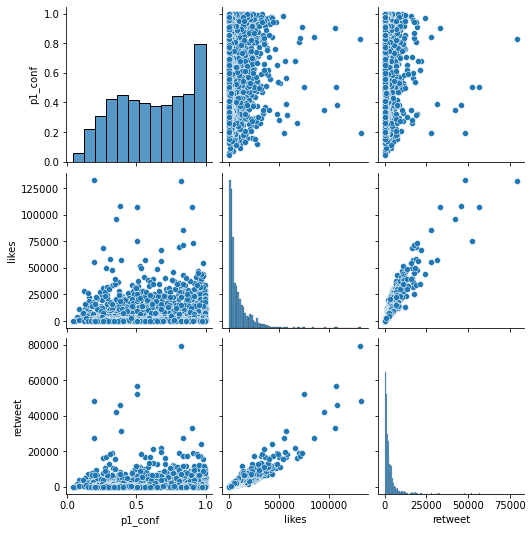

In [96]:
# using pariplot, we try to derive of any correlation between
# number of retweets and likes
sns.pairplot(df);

<b> Insight #1

<b> Favourite tweets are most often retweeted

In [97]:
df.describe()

,p1_conf,likes,retweet
count,1454.000000,1454.000000,1454.000000
mean,0.614113,9307.707015,2794.747593
std,0.261289,12655.167226,4790.947627
min,0.044333,81.000000,16.000000
25%,0.388533,2198.500000,653.250000
50%,0.615709,4481.500000,1440.500000
75%,0.855685,11864.000000,3264.000000
max,0.999956,132810.000000,79515.000000


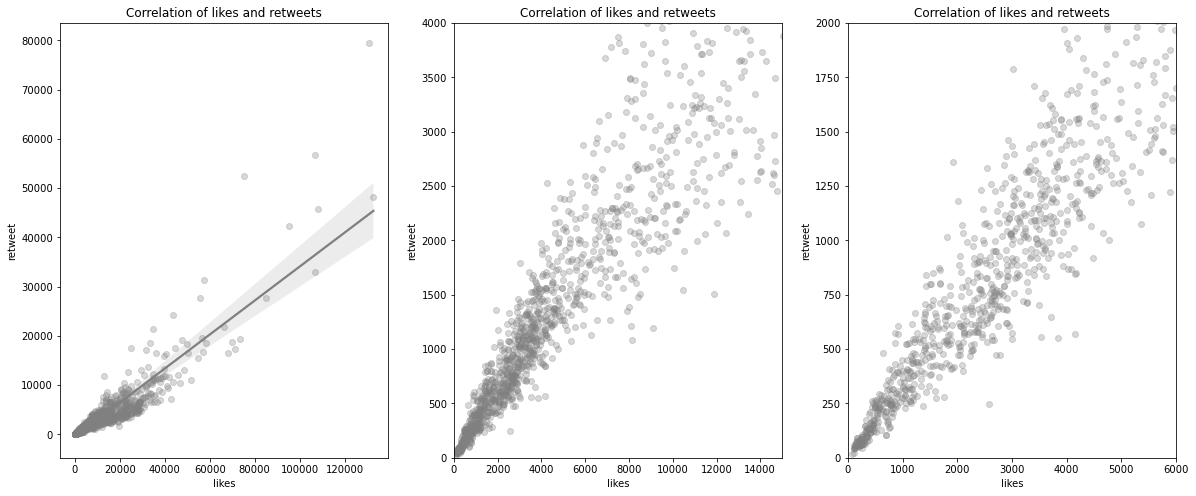

In [98]:
# likes and retweets scatter
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
g1 = sns.regplot(x = df.likes, y = df.retweet, color='grey', scatter_kws={'alpha':0.3})
g1.set(title = 'Correlation of likes and retweets')

plt.subplot(1,3,2)
g2 = sns.regplot(x = df.likes, y = df.retweet, fit_reg=False, color='grey', scatter_kws={'alpha':0.3})
g2.set(title = 'Correlation of likes and retweets', xlim=(0,15000), ylim=(0,4000))

plt.subplot(1,3,3)
g3 = sns.regplot(x = df.likes, y = df.retweet, fit_reg=False, color='grey', scatter_kws={'alpha':0.3})
g3.set(title = 'Correlation of likes and retweets', xlim=(0,6000), ylim=(0,2000))

plt.show()

In [99]:
#The correlation coefficent confirms that likes and retweets have a positive correlation.
df['likes'].corr(df['retweet'])

0.9108682038182961

<b> Insight #2

<b> Puppo Tweets are the most popular amongst the different stages

In [100]:
df.likes.mean()

9307.707015130674

In [101]:
# The groupby function by mean confirms that puppo is the most popular one based on the likes
df.groupby('dog_stage')['likes'].mean()

dog_stage
None        8729.488581
doggo      19478.000000
floofer    13701.375000
pupper      8048.430556
puppo      23585.000000
Name: likes, dtype: float64

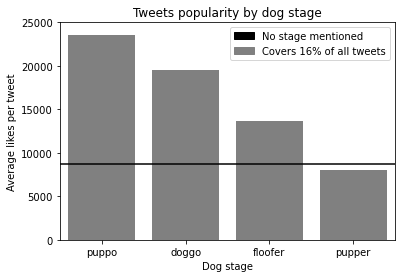

In [102]:
import matplotlib.patches as mpatches
sns.barplot(x = df.dog_stage, y = df.likes, order = ['puppo', 'doggo', 'floofer', 'pupper'], color = 'grey', errwidth = 0)
plt.axhline(8729, color='black')
non = mpatches.Patch(label='No stage mentioned', color='black')
cover = mpatches.Patch(label='Covers 16% of all tweets', color='grey')
plt.legend(handles=[non, cover])
plt.xlabel('Dog stage')
plt.ylabel('Average likes per tweet')
plt.title('Tweets popularity by dog stage')
plt.ylim((0,25000))
plt.show()

In [103]:
# puppo is popular but there are not many tweets associated with it
df.groupby('dog_stage')['likes'].count()

dog_stage
None       1226
doggo        56
floofer       8
pupper      144
puppo        20
Name: likes, dtype: int64

In [104]:
# share of dogstage
shares = df.groupby('dog_stage').agg({'dog_stage': 'count'})
shares.apply(lambda x: x / len(df))

,dog_stage
dog_stage,
None,0.843191
doggo,0.038514
floofer,0.005502
pupper,0.099037
puppo,0.013755


In [105]:
# only 15.68% of tweets have a dog stage mentioned in them and None tops the chart with 84.31%
1 - shares.loc['None'].apply(lambda x: x / len(df))

dog_stage    0.156809
Name: None, dtype: float64

In [106]:
# check for the high like nos for puppo
df.query('dog_stage == "puppo"').head(5)

,timestamp,source,text,name,jpg_url,p1,p1_conf,p2,p3,likes,retweet,dog_stage,rating
10,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,Bruno,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,pembroke,0.966327,cardigan,basenji,38818,8538,puppo,13.0/10.0
12,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,Stuart,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,labrador_retriever,redbone,15359,2321,puppo,13.0/10.0
52,2017-06-25 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,Snoopy,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,italian_greyhound,0.734684,whippet,ibizan_hound,19763,4319,puppo,13.0/10.0
68,2017-06-11 21:18:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V",Sebastian,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,cardigan,0.806674,pembroke,kelpie,35501,11007,puppo,13.0/10.0
91,2017-05-24 16:44:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,Shikha,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,eskimo_dog,0.616457,siberian_husky,malamute,16755,2697,puppo,12.0/10.0


<b> Insight #3

<b> Over 80% of the tweets use 1 of 4 most popular rating

In [107]:
# ratings by popularity
df.groupby('rating').count()['likes'].nlargest(10)

rating
12.0/10.0    377
10.0/10.0    313
11.0/10.0    301
13.0/10.0    215
9.0/10.0     103
8.0/10.0      56
7.0/10.0      23
14.0/10.0     22
6.0/10.0      12
5.0/10.0       9
Name: likes, dtype: int64

In [108]:
df.groupby('rating').count()['likes'].nlargest(4).sum() / len(df)

0.8294360385144429

In [109]:
df.groupby('rating').count()['likes'].nlargest(10).sum() / len(df)

0.984181568088033

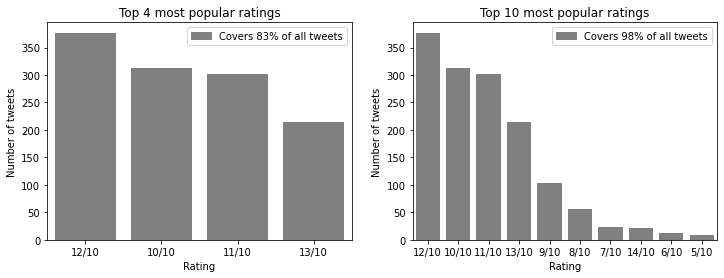

In [110]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
g = sns.barplot(x = ['12/10', '10/10', '11/10', '13/10'], \
            y = df.groupby('rating').count()['likes'].nlargest(4), color = 'grey');
g.set(title = 'Top 4 most popular ratings', xlabel = 'Rating', ylabel = 'Number of tweets')
cover = mpatches.Patch(label='Covers 83% of all tweets', color='grey')
plt.legend(handles=[cover])

plt.subplot(1,2,2)
g = sns.barplot(x = ['12/10', '10/10', '11/10', '13/10', '9/10', '8/10', '7/10', '14/10', '6/10', '5/10'], \
            y = df.groupby('rating').count()['likes'].nlargest(10), color = 'grey');
g.set(title = 'Top 10 most popular ratings', xlabel = 'Rating', ylabel = 'Number of tweets')
cover = mpatches.Patch(label='Covers 98% of all tweets', color='grey')
plt.legend(handles=[cover])

plt.show()

<b> Insight #4

<b> Walter is the most popular name among dogs

In [111]:
# names by popularity
df.groupby('name').count()['likes'].nlargest(10)

name
Walter     23
Daisy      16
Cooper     14
Sadie      14
Charlie    11
Lucy       11
Oliver     11
Koda       10
Penny      10
Bella       9
Name: likes, dtype: int64

In [112]:
# top 10 names cover only 9% of tweets
df.groupby('name').count()['likes'].nlargest(10).sum() / len(df)

0.08872077028885832

In [113]:
# because the names of dogs are diverse
df.name.nunique()

759

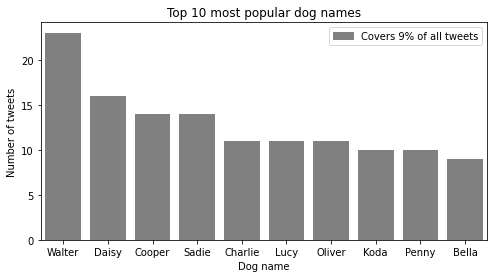

In [114]:
plt.figure(figsize=(8,4))
g = sns.barplot(x = ['Walter', 'Daisy', 'Cooper', 'Sadie', 'Charlie', 'Lucy', 'Oliver', 'Koda', 'Penny', 'Bella'], \
            y = df.groupby('name').count()['likes'].nlargest(10), color = 'grey')

g.set(title = 'Top 10 most popular dog names', xlabel = 'Dog name', ylabel = 'Number of tweets')
cover = mpatches.Patch(label='Covers 9% of all tweets', color='grey')
plt.legend(handles=[cover])

plt.show()